# 1st Trading Project

With the aid of Bagehot's contributions (The Only Game in Town Links to an external site.), and Copeland & Galai's model (Information Effects on the Bid-Ask Spread Links to an external site.) demonstrated how, even without transaction costs, a spread would exist. This led us to maximize the market maker's profit function in terms of a Bid & Ask price.

### parametros
1. **Precio de la acción sigue una distribución lognormal:**
   $$
   P \sim \text{Lognormal}(60, 2.25)
   $$
   Este parámetro indica que el precio de la acción sigue una distribución lognormal con una media de 60 y una varianza de $2.25$.

2. **Probabilidad de una operación informada:**
   $$
   \Pi_I = 0.4
   $$
   Aquí, $\Pi_I$ representa la probabilidad de que una operación sea informada, establecida en $0.4$ o $40\%$.

3. **Probabilidad de límite de compra ($\Pi_{LB}$) como función de $S$:**
   $$
   \Pi_{LB}(S) = 0.5 - 0.08S \quad \text{donde} \quad \Pi_{LB} \in [0, 0.5], \quad S = \left(A - S_0\right)
   $$
   Esta ecuación define $\Pi_{LB}$, la probabilidad de un límite de compra, como una función lineal de $S$, donde $S$ es la diferencia entre el precio de la acción propuesto $A$ y el precio inicial de la acción $S_0$.

4. **Probabilidad de límite de venta ($\Pi_{LS}$) como función de $S$:**
   $$
   \Pi_{LS}(S) = 0.5 - 0.08S \quad \text{donde} \quad \Pi_{LS} \in [0, 0.5], \quad S = \left(S_0 - B\right)
   $$
   Similar a $\Pi_{LB}$, esta ecuación define $\Pi_{LS}$, la probabilidad de un límite de venta, como una función lineal de $S$, donde $S$ es la diferencia entre el precio inicial de la acción $S_0$ y el precio de la oferta $B$.

5. **Precio inicial de la acción $S_0$:**
   $$
   S_0 = 65
   $$
   Aquí, $S_0$ se establece en 65, indicando el precio inicial de la acción antes de cualquier operación.


Use this wisely:

$$
\begin{aligned}
& \max _{K_A, K_B}\left\{\left(1-p_I\right)\left[p_{B L}\left(K_A-S_0\right)+p_{S L}\left(S_0-K_B\right)\right]\right. \\
&\left.-p_I\left[\int_{K_A}^{\infty}\left(S-K_A\right) f(S) d S+\int_0^{K_B}\left(K_B-S\right) f(S) d S\right]\right\} \geq 0
\end{aligned}
$$

---

In [2]:
from sympy import integrate, init_printing as sp
from sympy.abc import x as xsp
import scipy.stats as st
import scipy.optimize as opt
import tqdm
from scipy.integrate import quad
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

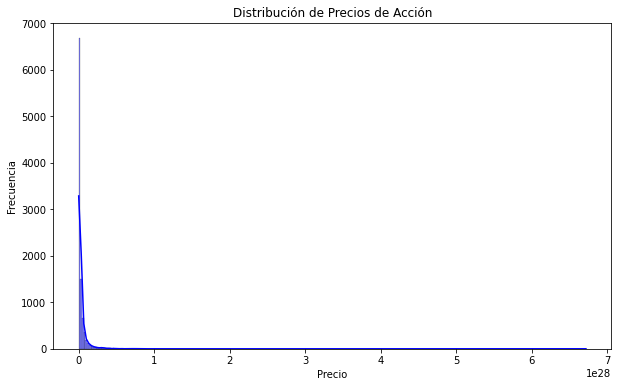

In [7]:
# Parámetros para la distribución Lognormal
mu = 60
sigma = np.sqrt(2.25)

num_simulations = 10000
prices = np.random.lognormal(mean=mu, sigma=sigma, size=num_simulations)

plt.figure(figsize=(10, 6))
sns.histplot(prices, bins=300, kde=True, color='blue')
plt.title('Distribución de Precios de Acción')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

In [8]:
np.mean(prices)

3.4677437673795664e+26